# Proyecto: Alquiler de ciclas - Etapa 2

El agua es el recutso natural mas necesitado por los humanos, esto debido a su uso en consumo y tareas cotidianas. Es por esto que es necesario monitorear la calidad de los cuerpos de agua, y evaluar las variaciones en las características fisicoquímicas de estos, con el fin de evitar el deterioro y preservar la calidad de estos ecosistemas para garantizar la disponibilidad de agua dulce para la población humana. Con esto en mente, para este proyecto se busca implementar dos modelos de aprendizaje supervisado con el objetivo de identificar la potabilidad del agua en torno a sus propiedades fisicoquímicas.


## Objetivos

A partir de los datos se busca construir dos modelo de clasificacion usando arboles de decision y k-vecinos mas cercanos que logren identificar la potabilidad del agua. Para esto se necesita cumplir con lo siguiente:

- Obtencion y exploracion de los datos.
- Preprocesamiento y preparacion de los datos.
- Definir y entrenar un GridSearch de un modelo de arboles de decision para obtener los mejores hiperparametros.
- Definir y entrenar un modelo de k-vecinos más cercanos tomando en cuenta la curva de validacion para considerar el mejor $k$.
- Evaluar ambos modelos y comparar sus rendimientos entre si para determinar cual se desenvolvio mejor.
- Determinar cuáles son los factores que más inciden en la contaminación de los cuerpos de agua con base en los datos.

## Entendimiento de los datos

Los datos son una modificacion de los que se encuentrarn en https://www.kaggle.com/datasets/adityakadiwal/water-potability, los cuales contienen las siguientes variables:

| Variable | Tipo | Descripción |
| --- | --- | --- |
| pH | numérico | El PH es un parámetro importante para evaluar el equilibrio ácido-base del agua. También es el indicador del estado ácido o alcalino del agua. La Organización MUmdial de la Salud (OMS) ha recomendado un límite máximo permisible de pH de 6,5 a 8,5. Los rangos de la investigación actual fueron de 6,52 a 6,83, que están en el rango de las normas de la OMS. |
| Dureza | numérico | La dureza está causada principalmente por las sales de calcio y magnesio. Estas sales se disuelven en los depósitos geológicos por los que pasa el agua. La dureza se definió originalmente como la capacidad del agua para precipitar el jabón causado por el Calcio y el Magnesio |
| Sólidos | numérico | (Sólidos totales disueltos - TDS). El agua tiene la capacidad de disolver una amplia gama de minerales inorgánicos y algunos orgánicos o sales como el potasio, el calcio, el sodio, los bicarbonatos, los cloruros, el magnesio, los sulfatos, etc. Estos minerales producen un sabor no deseado y un color diluido en la apariencia del agua. Este es el parámetro importante para el uso del agua. El agua con un alto valor de TDS indica que el agua está muy mineralizada. El límite deseable de TDS es de 500 mg/l y el límite máximo es de 1000 mg/l, que se prescribe para el consumo. |
| Cloraminas | numérico | El cloro y la cloramina son los principales desinfectantes utilizados en los sistemas públicos de agua. Las cloraminas se forman normalmente cuando se añade amoníaco al cloro para tratar el agua potable. Los niveles de cloro de hasta 4 miligramos por litro (mg/L o 4 partes por millón (ppm)) se consideran seguros en el agua potable. |
| Sulfatos | numérico | Los sulfatos son sustancias naturales que se encuentran en los minerales, el suelo y las rocas. Están presentes en el aire, las aguas subterráneas, las plantas y los alimentos. El principal uso comercial de los sulfatos es la industria química. La concentración de sulfato en el agua de mar es de unos 2.700 miligramos por litro (mg/L). En la mayoría de los suministros de agua dulce oscila entre 3 y 30 mg/L, aunque en algunos lugares geográficos se encuentran concentraciones mucho más altas (1000 mg/L). |
| Conductividad | numérico | El agua pura no es un buen conductor de la corriente eléctrica, más bien es un buen aislante. El aumento de la concentración de iones aumenta la conductividad eléctrica del agua. En general, la cantidad de sólidos disueltos en el agua determina la conductividad eléctrica. La conductividad eléctrica (CE) mide en realidad el proceso iónico de una solución que le permite transmitir la corriente. Según las normas de la OMS, el valor de la CE no debe superar los 400 μS/cm |
| Carbono_organico | numérico | El carbono orgánico total (COT) en las aguas procede de la materia orgánica natural en descomposición, así como de fuentes sintéticas. El COT es una medida de la cantidad total de carbono en compuestos orgánicos en el agua pura.  |
| Trihalometanos | numérico | Los Trihalometanos (THM) son sustancias químicas que pueden encontrarse en el agua tratada con cloro. La concentración de THM en el agua potable varía según el nivel de materia orgánica en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM de hasta 80 ppm se consideran seguros en el agua potable. |
| Turbidez | numérico | La turbidez del agua depende de la cantidad de materia sólida presente en estado de suspensión. Es una medida de las propiedades de emisión de luz del agua y la prueba se utiliza para indicar la calidad de los vertidos con respecto a la materia coloidal. El valor medio de turbidez obtenido para el Campus Wondo Genet (0,98 NTU) es inferior al valor recomendado por la OMS de 5,00 NTU. |
| Potabilidad | categorica | Indica si el agua es segura para el consumo, donde SI significa apta y NO significa no apta. |

A partir de esto vamos notando que los modelos de clasificacion tomaran como etiqueta la variable *Potabilidad* y se entrenaran entorno a las demas variables.

### Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, validation_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

#Indicamos a pandas que las visualizaciones se contruiran en Plotly y estableciendo seaborn por defecto

pd.options.plotting.backend = "plotly"

# Definimos k=10 para la validacion cruzada

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

### Obtencion y exploracion de los datos

Los datos se encuentran en el excel **Datos_Etapa-2.xlsx**, por lo tanto usando la funcion *read_excel* de pandas importaremos los datos en un DataFrame:

In [2]:
ruta = "Datos_Etapa-2.xlsx"
data_raw = pd.read_excel(ruta, na_values=['?'])

In [3]:
data_raw

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
0,NaN,204.89,20791.32,7.30,368.52,564.31,10.38,86.99,2.96,NO
1,3.72,129.42,18630.06,6.64,NaN,592.89,15.18,56.33,4.50,NO
2,8.10,224.24,19909.54,9.28,NaN,418.61,16.87,66.42,3.06,NO
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO
...,...,...,...,...,...,...,...,...,...,...
3271,4.67,193.68,47580.99,7.17,359.95,526.42,13.89,66.69,4.44,SI
3272,7.81,193.55,17329.80,8.06,NaN,392.45,19.90,NaN,2.80,SI
3273,9.42,175.76,33155.58,7.35,NaN,432.04,11.04,69.85,3.30,SI
3274,5.13,230.60,11983.87,6.30,NaN,402.88,11.17,77.49,4.71,SI


In [4]:
data_raw.describe()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080804,196.369481,22014.092415,7.122241,333.775784,426.205171,14.284921,66.396281,3.966731
std,1.594369,32.879680,8768.570852,1.583143,41.416864,80.824123,3.308232,16.174983,0.780354
min,0.000000,47.430000,320.940000,0.350000,129.000000,181.480000,2.200000,0.740000,1.450000
25%,6.090000,176.847500,15666.687500,6.130000,307.695000,365.735000,12.070000,55.847500,3.440000
50%,7.040000,196.965000,20927.830000,7.130000,333.070000,421.885000,14.220000,66.620000,3.955000
75%,8.060000,216.670000,27332.760000,8.112500,359.950000,481.790000,16.560000,77.337500,4.500000
max,14.000000,323.120000,61227.200000,13.130000,481.030000,753.340000,28.300000,124.000000,6.740000


Notamos que contamos con un DataFrame con dimensiones (3276x10), donde se encuentran valores Nan en multiples variables. La variable objetivo presenta la siguiente distribucion:

In [5]:
data_raw['Potabilidad'].value_counts().plot.bar()

Es evidente que hay menor proporcion de valores SI en la potabilidad. Esto es importante de observar debido a que influye en el entrenamiento de los modelos, los modelos pueden aprenden que este valor presenta menor proporcionalidad en rasgos generales.

### Preparacion de los datos

Empecemos el proceso de limpieza generando una copia de los datos sobre la que se hara las modificaciones:

In [6]:
data = data_raw.copy()

A partir de este nuevo dataframe podemos proceder a la observacion de los valores nulos y los duplicados:

In [7]:
data.isna().sum()

pH                  491
Dureza                0
Sólidos               0
Cloraminas            0
Sulfatos            781
Conductividad         0
Carbono_orgánico      0
Trihalometanos      162
Turbidez              0
Potabilidad           0
dtype: int64

In [61]:
data.duplicated().sum()

0

La mayor parte de los valores nulos estan en la variable Sulfatos, esto se entiende como una falta de informacion sobre la variable en el proceso de entreno, por lo tanto lo mejor es eliminar dichos valores nulos a pesar de su gran porcentaje frente a la muestra.

### Preparacion de los datos

Usando las funciones de pandas podemos eliminar toda fila con algun valor nulo, esto reduce significativamente nuestra muestra:

In [8]:
data = data.dropna(axis=0)

In [9]:
data

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
3,8.32,214.37,22018.42,8.06,356.89,363.27,18.44,100.34,4.63,NO
4,9.09,181.10,17978.99,6.55,310.14,398.41,11.56,32.00,4.08,NO
5,5.58,188.31,28748.69,7.54,326.68,280.47,8.40,54.92,2.56,NO
6,10.22,248.07,28749.72,7.51,393.66,283.65,13.79,84.60,2.67,NO
7,8.64,203.36,13672.09,4.56,303.31,474.61,12.36,62.80,4.40,NO
...,...,...,...,...,...,...,...,...,...,...
3267,8.99,215.05,15921.41,6.30,312.93,390.41,9.90,55.07,4.61,SI
3268,6.70,207.32,17246.92,7.71,304.51,329.27,16.22,28.88,3.44,SI
3269,11.49,94.81,37188.83,9.26,258.93,439.89,16.17,41.56,4.37,SI
3270,6.07,186.66,26138.78,7.75,345.70,415.89,12.07,60.42,3.67,SI


Observemos nuevamente las distribuciones de valores para la variable objetivo:

In [10]:
data['Potabilidad'].value_counts().plot.bar()

Notamos que la eliminacion de valores nulos deja casi invariante la propocion entre los valores. Finalmente, procedemos a dividir los datos de entrenamiento y testeo:

In [62]:
train, test = train_test_split(data, test_size=0.2, random_state=77)
train.head()

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez,Potabilidad
530,6.64,198.88,27867.49,7.33,318.41,573.72,13.19,81.55,4.69,NO
2475,4.99,141.62,44499.73,8.26,335.51,534.71,15.35,62.90,3.93,NO
3146,8.30,183.61,20316.43,7.11,322.10,295.65,13.50,62.23,4.24,SI
1183,7.06,188.39,20567.15,7.44,360.32,656.92,16.27,84.83,4.40,SI
407,8.20,214.52,10389.54,6.30,327.19,403.19,15.07,72.76,3.22,SI


Y aislamos la variable objetivo:

In [13]:
x_train = train.drop(['Potabilidad'],axis=1)
y_train = train['Potabilidad']

x_test = test.drop(['Potabilidad'],axis=1)
y_test = test['Potabilidad']

### Árboles de decisión

Empecemos el modelado con los arboles de decision, para este modelos es mejor no realizar un preprocesamiento de los datos, debido a que se espera que el arbol nos indique los umbrales de decision sobre los datos. Para el entrenamiento del modelo necesitamos definir un diccionario con los valores que se van a considerar en el GridSearch para obtener los mejores hiperparametros:

In [14]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [4, 6, 8, 10, 12],
              'min_samples_split': [3, 4, 5]}

In [15]:
decision_tree = DecisionTreeClassifier(class_weight='balanced')
grid = GridSearchCV(decision_tree, param_grid, cv=kfold, n_jobs=-1)

Con el grid definido procedemos al ajuste con los datos:

In [16]:
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_split': [3, 4, 5]})

Podemos observar los hiperparametros obtenidos para el mejor desempeño:

In [17]:
print("Mejores parámetros: {}".format(grid.best_params_))

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4}


Extraigamos el modelo con dichos parametros:

In [18]:
mejor_modelo = grid.best_estimator_

A partir de este modelo podemos visualizar la importancia de las variables en la clasificacion del agua y las desiciones que toma el arbol para determinar la categoria:

In [19]:
importancia = mejor_modelo.feature_importances_
importancia_df = pd.DataFrame(data={'Variable':x_train.columns, 'Importancia':importancia})
importancia_df.sort_values('Importancia', ascending=False)

,Variable,Importancia
0,pH,0.230632
4,Sulfatos,0.169931
2,Sólidos,0.165558
3,Cloraminas,0.118742
1,Dureza,0.105622
6,Carbono_orgánico,0.067787
5,Conductividad,0.065246
8,Turbidez,0.046702
7,Trihalometanos,0.029779


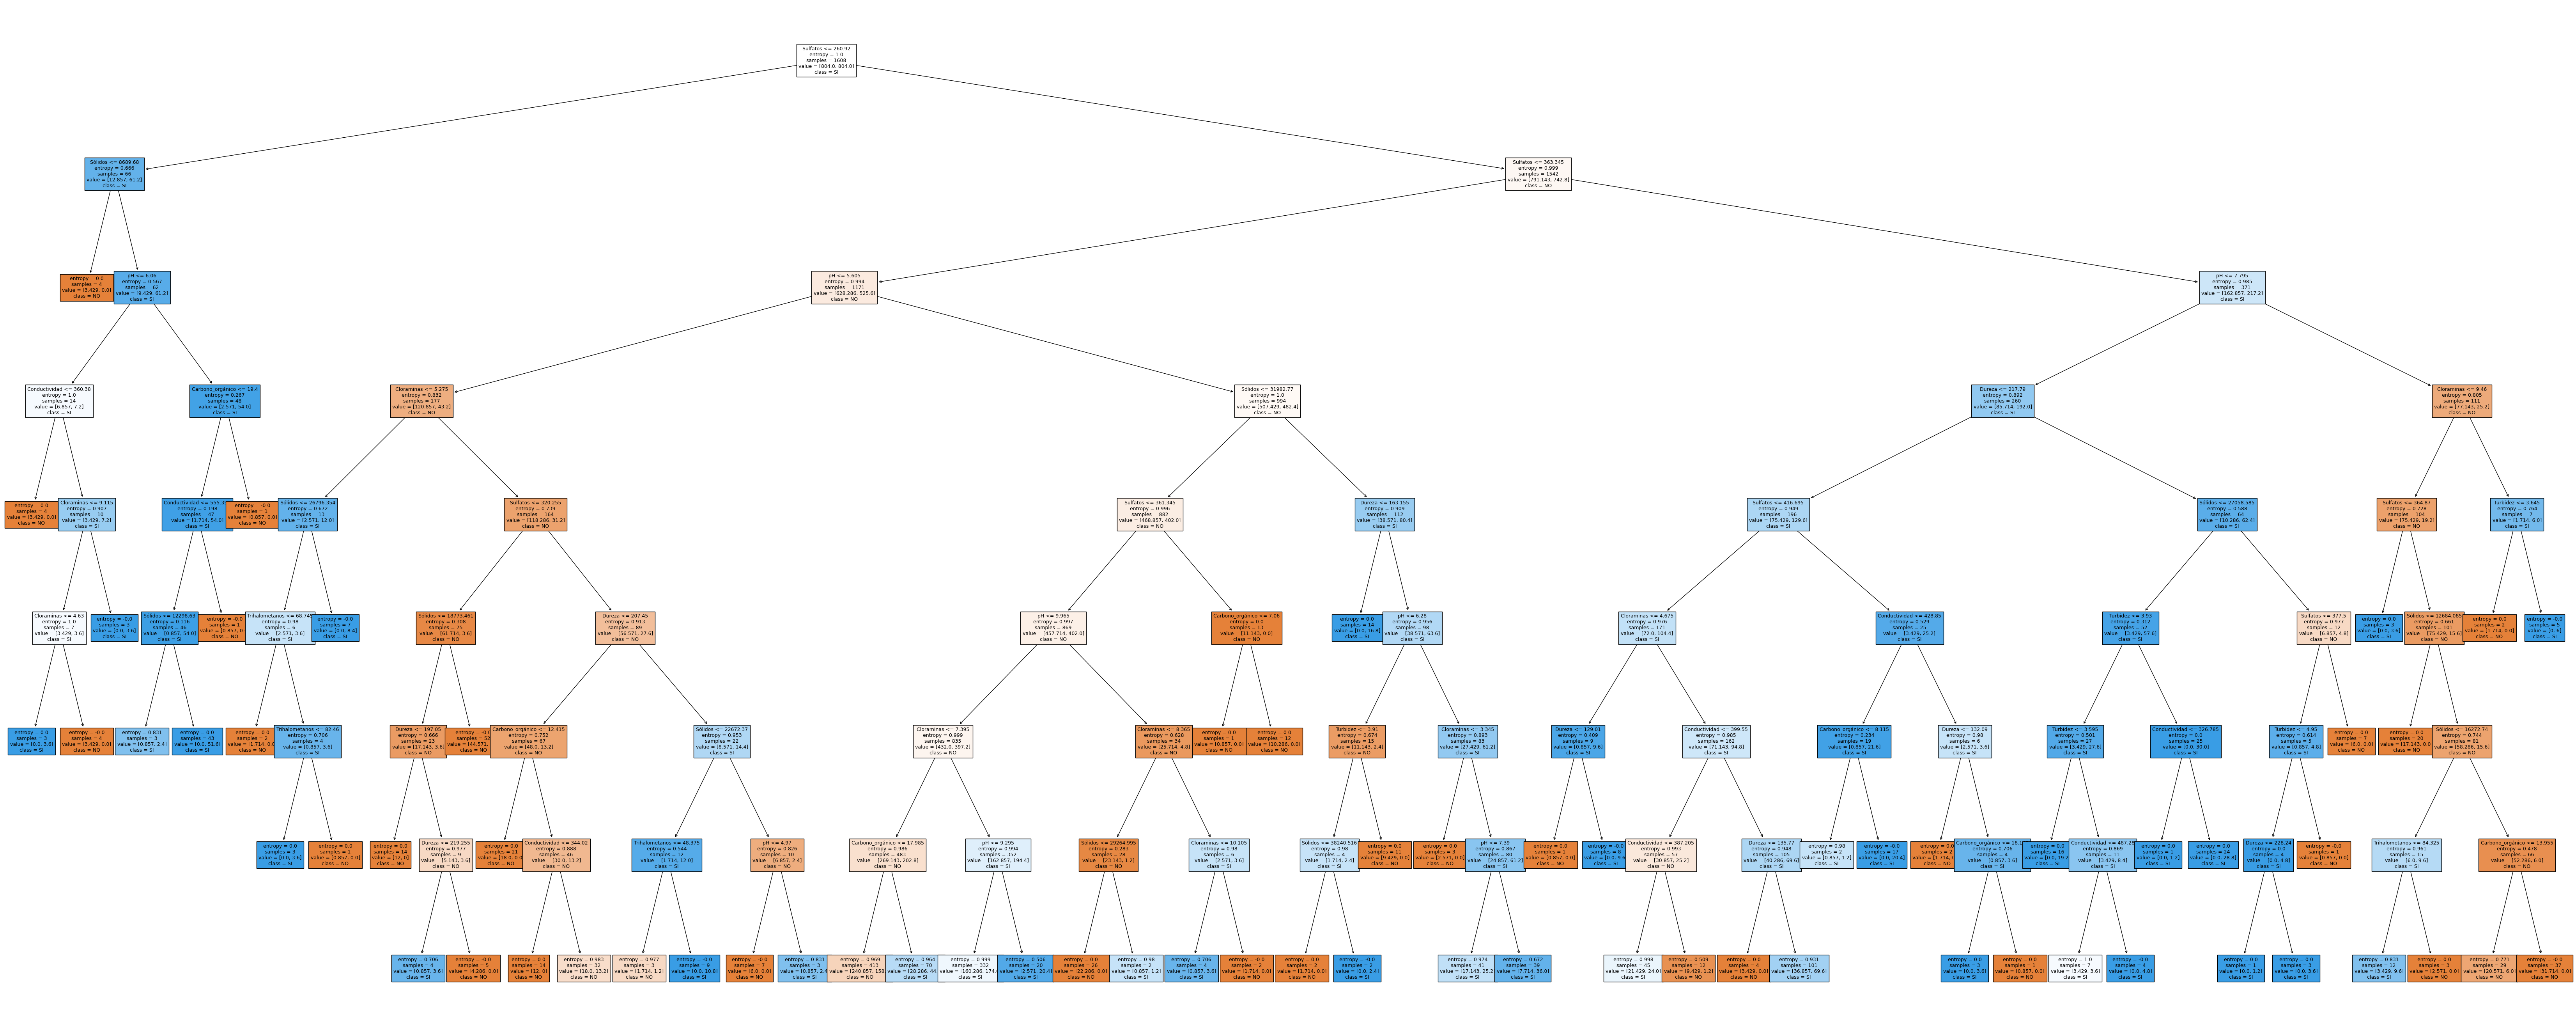

In [31]:
plt.figure(figsize=(85,34))
tree = plot_tree(mejor_modelo, feature_names=list(x_train.columns), class_names=['NO','SI'], filled=True, fontsize=9)

Observamos que el pH es uno de los determinantes de la potabilidad del agua, ademas notamos la complejidad a la que llego el modelo para clasificar los datos.

#### Evaluacion del modelo

Con el modelo entrenado queda evaluar su desempeño bajo datos fuera del entrenamiento, generamos la prediccion del modelo sobre los datos de testeo:

In [32]:
y_pred = mejor_modelo.predict(x_test)

 A partir de esto podemos producir la matriz de confusion que nos indica como se comportaron las predicciones del modelo:

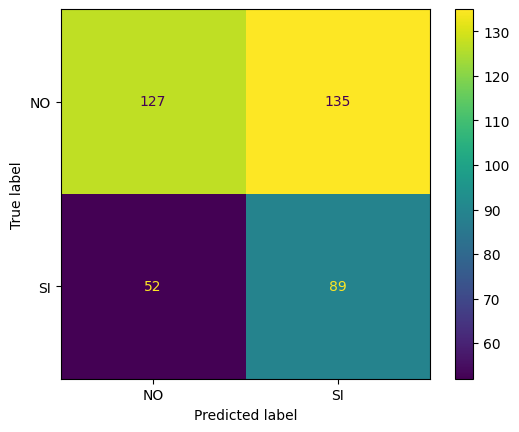

In [33]:
ConfusionMatrixDisplay.from_estimator(mejor_modelo, x_test, y_test)

Ademas a partir de esta matriz podemos calcular las diferentes metricas:

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.71      0.48      0.58       262
          SI       0.40      0.63      0.49       141

    accuracy                           0.54       403
   macro avg       0.55      0.56      0.53       403
weighted avg       0.60      0.54      0.55       403



Notamos que el unico valor considerablemente alto es el de la precision, y ligeramente el f1, del NO, esto nos indica que el modelo no es tan confiable para identificar casos diferentes al agua no potable, es decir, este modelo es util para reconocer el agua no potable.

### Seleccion de variables

Los arboles de decision resultan ser muy utiles debido a que describen el comportamiento de los datos y los umbrales a tener en cuenta para la clasificacion. Esta ventaja la podemos aprovechar entrenando un arbol restringido a una profundidad de 3, de donde podremos deducir las variables de mayor relevancia para la clasificacion:


In [35]:
decision_tree_reglas = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
decision_tree_reglas.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [36]:
importancia = decision_tree_reglas.feature_importances_
importancia_df = pd.DataFrame(data={'Variable':x_train.columns, 'Importancia':importancia})
importancia_df.sort_values('Importancia', ascending=False)

,Variable,Importancia
0,pH,0.623044
4,Sulfatos,0.313444
2,Sólidos,0.063512
1,Dureza,0.000000
3,Cloraminas,0.000000
5,Conductividad,0.000000
6,Carbono_orgánico,0.000000
7,Trihalometanos,0.000000
8,Turbidez,0.000000


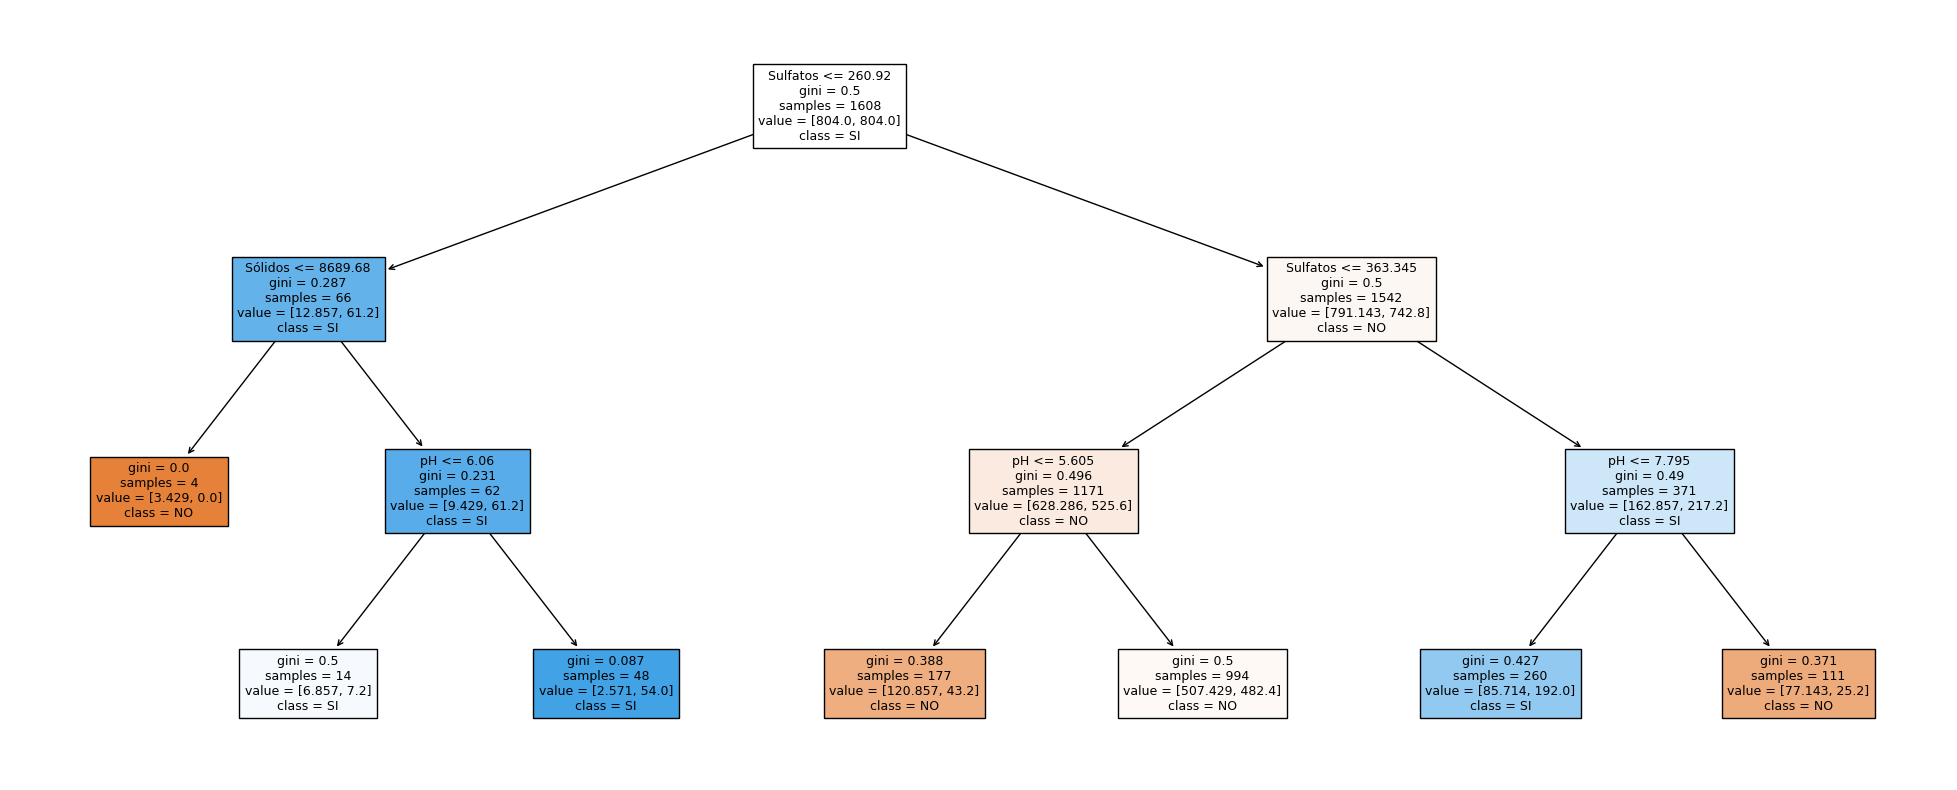

In [38]:
plt.figure(figsize=(25,10))
tree = plot_tree(decision_tree_reglas, feature_names=list(x_train.columns), class_names=['NO','SI'], filled=True, fontsize=9)

Concluimos entonces que el pH, los sulfatos y los solidos son las variables mas relevantes para determinar la potabilidad del agua, ademas del arbol observamos que los umbrales para que el agua se clasifique como no potable son $sulfatos > 363.345$ y $pH<5.6$. Ademas, no esta de mas calcular las metricas para este modelo y corroborar que es confiable los umbrales identificados:

In [39]:
y_pred = decision_tree_reglas.predict(x_test)

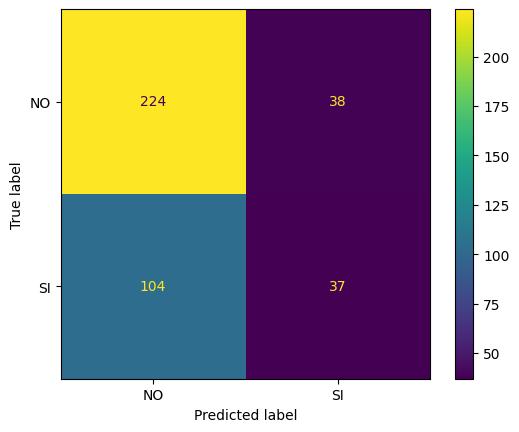

In [41]:
ConfusionMatrixDisplay.from_estimator(decision_tree_reglas, x_test, y_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.68      0.85      0.76       262
          SI       0.49      0.26      0.34       141

    accuracy                           0.65       403
   macro avg       0.59      0.56      0.55       403
weighted avg       0.62      0.65      0.61       403



Notamos un alto valor de precision, recall y f1 para la clase negativa, esto es bueno debido a que nos inidica que el modelo es bueno identificando los casos en los que el agua no es potable. Por lo tanto el umbral obtenido es confiable.

### K-vecinos más cercanos

Ahora procedemos con el modelo de k-vecinos mas cercanos, debido a que este modelo calcula la distancia entre los puntos, lo mejor es realizar una estandarización para que la escala de las variables no tengan influencia sobre la clasificación. Para esto usamos *StandarScaler*:

In [43]:
columns = x_train.columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=columns)
x_train

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
0,-0.286308,0.079568,0.689866,0.133461,-0.346818,1.842134,-0.347119,0.948041,0.911092
1,-1.337777,-1.658806,2.610412,0.713844,0.061174,1.357273,0.309327,-0.216662,-0.084907
2,0.771533,-0.384019,-0.182064,-0.003834,-0.258778,-1.614038,-0.252907,-0.258504,0.321356
3,-0.018662,-0.238901,-0.153113,0.202108,0.653122,2.876239,0.588925,1.152879,0.531040
4,0.707807,0.554388,-1.328334,-0.509330,-0.137334,-0.277408,0.224232,0.399100,-1.015380
...,...,...,...,...,...,...,...,...,...
1603,-0.624053,1.605427,2.696983,0.158423,0.138955,-1.373906,-0.936706,1.392065,-1.172643
1604,-0.764249,1.305781,-0.157787,-0.478126,0.198365,-0.272063,1.406444,-0.157334,0.517934
1605,0.701435,1.012510,-1.004087,-0.690309,0.026340,2.236759,0.160411,2.307591,-0.399433
1606,1.071042,0.580193,-0.914958,0.270756,-0.242076,-0.702111,1.394287,-0.725010,-0.281486


Con los datos preparados para el entrenamiento del modelo, podemos definir una lista con algunos valores del hiperparametro **k** para poder estudiar el comportamiento bajo una curva de validacion y asi determinar el **k** que produce un mejor desempeño:

In [44]:
k_values = [1, 2, 3, 4, 5]
k_values

[1, 2, 3, 4, 5]

In [45]:
train_scores, val_scores = validation_curve(estimator=KNeighborsClassifier(),
                                            X=x_train,
                                            y=y_train,
                                            param_name='n_neighbors',
                                            param_range=k_values,
                                            scoring='accuracy',
                                            cv=10)

In [46]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

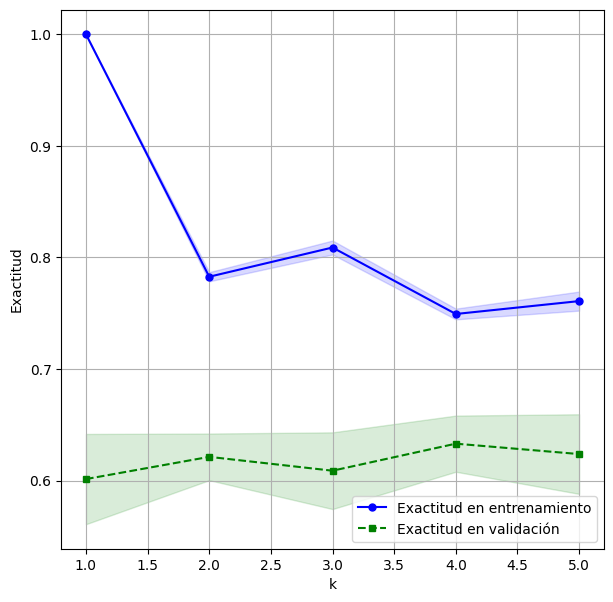

In [47]:
plt.figure(figsize=(7,7))

plt.plot(k_values, train_mean, color='blue', marker='o', markersize=5, label='Exactitud en entrenamiento')
plt.fill_between(k_values, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')

plt.plot(k_values, val_mean, color='green', linestyle='--', marker='s', markersize=5, label='Exactitud en validación')
plt.fill_between(k_values, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('k')
plt.ylabel('Exactitud')
plt.show()

Con la curva de validacion notamos que el valor de exactitud mas alto se alcanza para $k=4$:

In [48]:
mejor_indice = np.argmax(val_mean)
mejor_k = k_values[mejor_indice]
mejor_k

4

Obtenemos este valor y lo usamos para entrenar el mejor modelo de knn:

In [49]:
knn = KNeighborsClassifier(n_neighbors=mejor_k).fit(x_train, y_train)

### Evaluacion del modelo

Lo que procede ahora es evaluar el desempeño del modelo bajo datos de prueba:

In [50]:
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=columns)
x_test

,pH,Dureza,Sólidos,Cloraminas,Sulfatos,Conductividad,Carbono_orgánico,Trihalometanos,Turbidez
0,-0.139740,1.670700,-0.018973,1.050841,-1.268500,1.416436,-0.407902,-0.621967,0.963513
1,1.077414,-0.143573,-0.014375,-1.476635,1.295651,0.124427,-0.745242,-0.645698,-0.215960
2,1.517119,-0.821193,1.324708,0.838658,-0.405273,0.300920,-1.195030,0.497148,-1.094011
3,0.573984,0.117517,-0.497687,-0.216018,-0.867904,-0.595718,-1.228460,0.032515,0.989723
4,-1.528953,0.140590,1.188098,0.907305,0.758818,1.135289,-0.587209,1.165369,-1.657537
...,...,...,...,...,...,...,...,...,...
398,-1.981403,-1.075908,-0.861340,0.807454,-0.516457,-0.138947,1.956522,0.743203,-0.320802
399,-1.082875,-0.719793,0.716604,-0.827604,0.946590,0.994715,0.971852,0.056247,0.832460
400,-0.420132,-0.544316,0.473499,0.108498,-0.077448,1.755503,-0.717890,-0.351556,2.667196
401,-0.917189,-0.255902,0.459052,-2.244239,0.121300,0.382207,0.354914,0.385986,1.133881


In [57]:
y_pred = knn.predict(x_test)

Generamos la matriz de confusion y el reporte de las metricas:

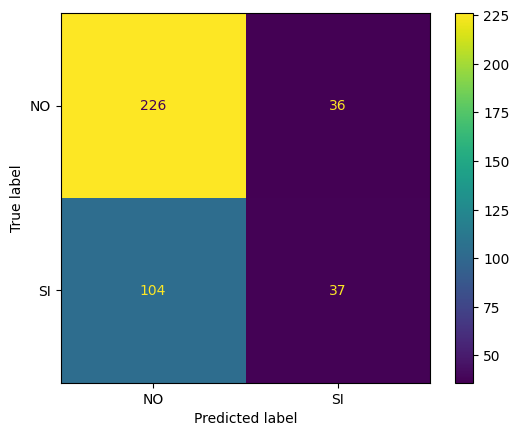

In [59]:
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.68      0.86      0.76       262
          SI       0.51      0.26      0.35       141

    accuracy                           0.65       403
   macro avg       0.60      0.56      0.55       403
weighted avg       0.62      0.65      0.62       403



Notamos que, al igual que el arbol de decision, el modelo se desenvuelve mejor identificando los casos negativos.

## Conclusiones

Al final se obtuvieron los siguientes resultados para los mejores modelos:

|  | NO |  | SI |  |
| --- | --- | --- | --- | --- |
|   | DT | KNN | DT | KNN |
| precision | 0.68 | 0.68 | 0.49 | 0.51 |
| recall | 0.85 | 0.86 | 0.26 | 0.26 |
| f1 | 0.76 | 0.76 | 0.34 | 0.35 |


Lo primero que se nota es que los desempeños fueron casi que iguales, y teniendo en cuenta el sesgo de mayor cantidad de muestras negativas podemos concluir inicialmente que si hubo influencia sobre el modelo no tener igual cantidad de muestras positivas que negativas, resultando en modelos que se desempeñan mejor identificando los casos negativos, los cuales se veian mas representados por la muestra. A pesar de esto, estos resultados se pueden considerar satisfactorios para el objetivo del proyecto debido a que dichos modelos nos permiten identificar las condiciones donde se pierde la potabilidad del agua. Ahora, si se desea mejor el desempeño general de clasificacion, es necesario considerar aumentar las muestras positivas para obtener mejores resultados en su clasificacion.

Por otro lado, el objetivo es identificar el agua cuando el agua no es potable, y resulta mejor encontrar un caso donde se indica un falso negativo debido a que si se decide tratar el agua, esto no genera un impacto negativo sobre esta. En cambio, un falso positivo no permitiria tratar agua no potable desencadenando un la posible perdidad de un ecosistema. Por lo tanto, se busca que el modelo cuente se desenvuelva mejor en la metrica de recall negativa, y se espera un buen desempeño en la precision pero no con la misma importancia que el recall. A partir de los resultados notamos que se obtuvo lo esperado de los modelos, los cuales se desempeñaron mejor en la identificacion de casos negativos reduciendo significativamente la cantidad de falsos positivos.

Finalmente, a pesar de que ambos modelos presentaron desempeños similares, para este contexto resulta beneficioso seleccionar el modelo de arboles de decision, esto gracias a su explicabilidad, es decir, este modelo permite comprender el proceso de clasificacion de las muestras y entender mejor el comportamiento de estas. Por ejemplo, teniendo en cuenta lo hallado en la seccion de arboles de decision, el pH de la muestra es la variable mas relevante para su potabilidad, mas aun, un bajo pH es indicativo de que el agua no es potable, esto concuerda con el hecho de que la vida biologica requiere de mas alcalinidad que acidez en el agua, sabiendo esto se facilita la identificacion de agua no potable. Por indicativos como este es que los arboles de decision resultan mejor en este contexto para comprender lo que esta ocurriendo con las muestras.

# Autor

Este es un proyecto realizado para el curso "Principios del machine learning" ofrecido por la universidad de los Andes para la maestria en inteligencia artificial.

Autor: Juan A. Guzman.